Daniel Rocha Ruiz, MSc in Data Science and Business Analytics

# Introduction
## Summary
- This notebook is a cookbook for a few basic regression types with the **Scikit-LearnScikit-Learn** package.
- We will go through the most fundamental steps of model development, but our goal is really to demo the package.
- We will run Univariate and Multivariate Linear Regressions, exploring the famous `diabetes` dataset.
- We will also run Binary and Multinomial Logistic Regression, exploring the also famous `digits` dataset.

## Sources
- https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
- https://pypi.org/project/statsmodels/
- https://www.statsmodels.org/stable/index.html
- https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
- https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

# Regressions
## Set-up
### Import packages
In this section we import the **Stats-Models** packages, as well as a few other general packages.

In [1]:
# general packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# statsmodels
# if you have just run "pip install statsmodels", you might need to close and relaunch Jupyter for the package to function properly.
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.regression.linear_model import OLS

# scikit-learn
from sklearn import datasets
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

### Load and prepare the data
The first example explores Scikit-Learn's `diabetes` dataset. It goes through the basic steps of running an univariate linear regression, including the minimization, quality measures and plotting.

In [2]:
# Load the dataset
# Sklearn has a few built-in datasets. This dataset analyses the evolution of diabetes in a set of patients.
dataset = datasets.load_diabetes()

# For the StatsModels datasets:
#dataset = sm.datasets.get_rdataset("Guerry", "HistData").data

# Description
print("Dataset columns:", dataset.keys())
print("Dataset feature mames:", dataset.feature_names)
print("Dataset data dimension:", dataset.data.shape)
print(dataset.DESCR)

Dataset columns: dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
Dataset feature mames: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Dataset data dimension: (442, 10)
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - 

## Univariate Linear Regression
### Train the model

In [3]:
# Univariate regression -> We use only one feature
# Y = Quantitative measure of disease progression one year after baseline
# X = Body Mass Index (Normalized)

dataset_X = dataset.data[:, np.newaxis, 2]
dataset_y = dataset.target
print("Univariate X:", dataset_X.shape)

# We divide our dataset into training/testing sets

dataset_X_train, dataset_X_test, dataset_y_train, dataset_y_test = train_test_split(dataset_X, dataset_y, test_size=0.2, random_state=0)
print("Training set dimension (X):", dataset_X_train.shape)
print("Test set dimension (X):", dataset_X_test.shape)
print("Training set dimension (Y):", dataset_y_train.shape)
print("Test set dimension (Y):", dataset_y_test.shape)

Univariate X: (442, 1)
Training set dimension (X): (353, 1)
Test set dimension (X): (89, 1)
Training set dimension (Y): (353,)
Test set dimension (Y): (89,)


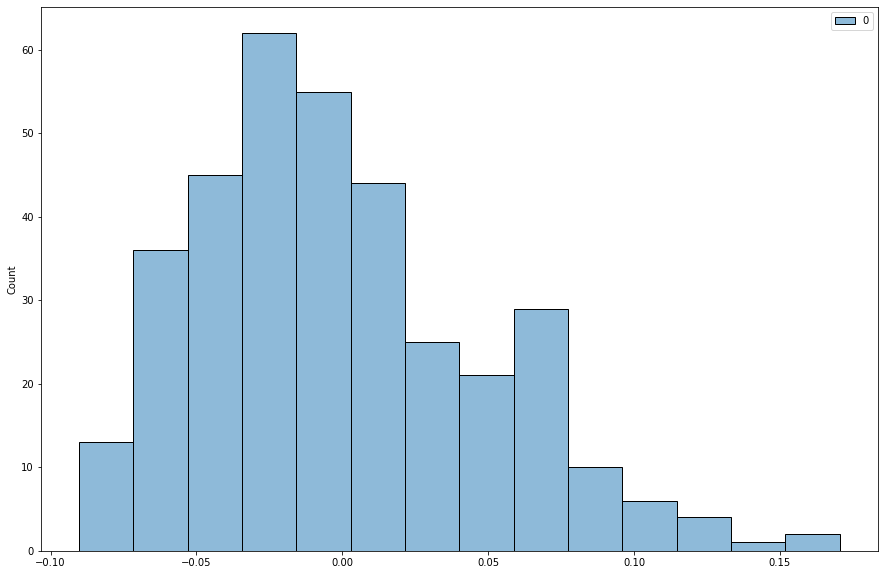

In [4]:
# Visualizing the training set
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.histplot(dataset_X_train)
plt.show()

#### R-Like (Optional)
- Here the codes with an "R-like" format.

In [5]:
# Univariate regression -> We use only one feature
# Y = Quantitative measure of disease progression one year after baseline
# X = Body Mass Index (Normalized)

dataset_train = pd.concat([pd.DataFrame(dataset_X_train), pd.DataFrame(dataset_y_train)], axis=1)
dataset_train.columns = ["bmi","target"]

model = ols("target ~ bmi", data=dataset_train)
results = model.fit()

# Printing the results is super easy! It's the same result as the code below!
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     211.2
Date:                Mon, 09 May 2022   Prob (F-statistic):           8.70e-38
Time:                        11:24:03   Log-Likelihood:                -1957.0
No. Observations:                 353   AIC:                             3918.
Df Residuals:                     351   BIC:                             3926.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.2882      3.303     46.111      0.0

#### Numpy
- Here the same codes, but with Numpy.

In [6]:
# Univariate regression -> We use only one feature
# Y = Quantitative measure of disease progression one year after baseline
# X = Body Mass Index (Normalized)

model = OLS(dataset_y_train, sm.add_constant(dataset_X_train))
results = model.fit()

# Printing the results is super easy! It's the same result as the code above!
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     211.2
Date:                Mon, 09 May 2022   Prob (F-statistic):           8.70e-38
Time:                        11:24:03   Log-Likelihood:                -1957.0
No. Observations:                 353   AIC:                             3918.
Df Residuals:                     351   BIC:                             3926.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.2882      3.303     46.111      0.0

### Analyse the results

In [7]:
# The coefficients
print("Intercept & Coefficients:\n", results.params)

Intercept & Coefficients:
 [152.28824927 981.65543614]


In [9]:
# Make predictions using the test set
dataset_y_pred = results.predict(sm.add_constant(dataset_X_test))

In [10]:
# Quality metrics
# The mean squared error
print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(dataset_y_test, dataset_y_pred)))
print("Mean Squared Error: {:.2f}".format(mean_squared_error(dataset_y_test, dataset_y_pred)))
print("Root Mean Squared Error: {:.2f}".format(mean_squared_error(dataset_y_test, dataset_y_pred)**0.5))
# Explained variance score (1 is perfect prediction)
print("R-Square: {:.2f}".format(results.rsquared))

Mean Absolute Error: 52.94
Mean Squared Error: 4150.68
Root Mean Squared Error: 64.43
R-Square: 0.38


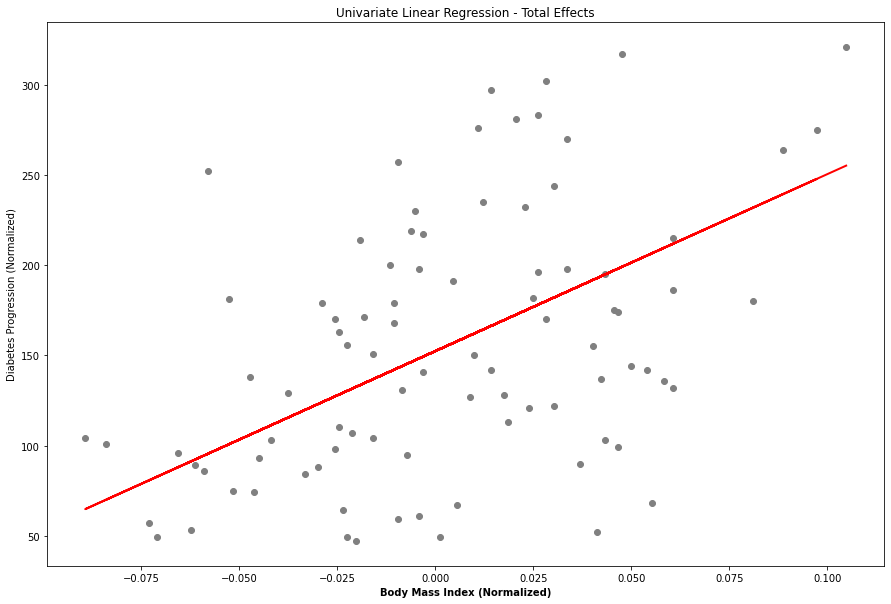

In [12]:
# Plot outputs
dataset_X_plot = dataset_X_test
dataset_y_plot = dataset_y_test

plt.figure(figsize=(15,10))
plt.tight_layout()
plt.scatter(dataset_X_plot, dataset_y_plot,  color='gray')
plt.plot(dataset_X_plot, dataset_y_pred, color='red', linewidth=2)
plt.title("Univariate Linear Regression - Total Effects")
plt.xlabel("Body Mass Index (Normalized)",fontweight="bold")
plt.ylabel("Diabetes Progression (Normalized)")
plt.show()

## Multivariate Linear Regression
### Train the model

In [13]:
# Multivariate Regression -> We use all features available
# The same steps as in the univariate regression
dataset_X = pd.DataFrame(dataset.data)
dataset_X.columns = dataset.feature_names

dataset_y = dataset.target

print("Multivariate X:", dataset_X.shape)
dataset_X_train, dataset_X_test, dataset_y_train, dataset_y_test = train_test_split(dataset_X, dataset_y, test_size=0.2, random_state=0)
model = OLS(dataset_y_train,  sm.add_constant(dataset_X_train))
results = model.fit()

print(results.summary())

dataset_y_pred = results.predict(sm.add_constant(dataset_X_test))

Multivariate X: (442, 10)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     42.47
Date:                Mon, 09 May 2022   Prob (F-statistic):           4.05e-54
Time:                        11:24:23   Log-Likelihood:                -1897.7
No. Observations:                 353   AIC:                             3817.
Df Residuals:                     342   BIC:                             3860.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.5381     

### Analyse the results

In [14]:
# Quality metrics
# The mean squared error
print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(dataset_y_test, dataset_y_pred)))
print("Mean Squared Error: {:.2f}".format(mean_squared_error(dataset_y_test, dataset_y_pred)))
print("Root Mean Squared Error: {:.2f}".format(mean_squared_error(dataset_y_test, dataset_y_pred)**0.5))
# Explained variance score (1 is perfect prediction)
print("R-Square: {:.2f}".format(results.rsquared))

Mean Absolute Error: 46.17
Mean Squared Error: 3424.32
Root Mean Squared Error: 58.52
R-Square: 0.55


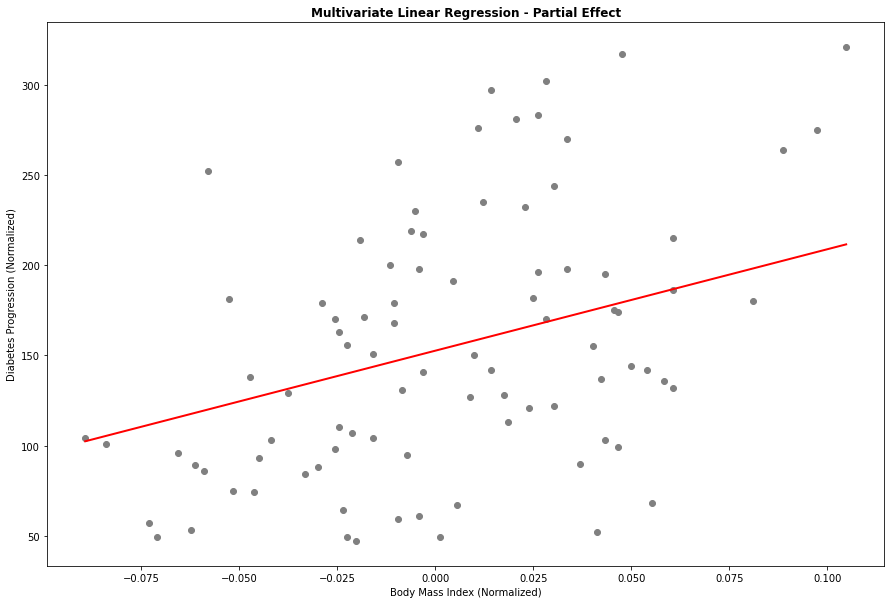

In [15]:
# Plot outputs
dataset_X_plot = dataset_X_test.bmi
dataset_y_plot = dataset_y_test

plt.figure(figsize=(15,10))
plt.tight_layout()
plt.scatter(dataset_X_plot, dataset_y_plot,  color='gray')

sup = np.linspace(dataset_X_plot.min(),dataset_X_plot.max(),len(dataset_y_plot))
plt.plot(sup, [results.params["const"] + i*results.params["bmi"]  for i in sup], color='red', linewidth=2)

plt.title("Multivariate Linear Regression - Partial Effect",fontweight="bold")
plt.xlabel("Body Mass Index (Normalized)")
plt.ylabel("Diabetes Progression (Normalized)")

plt.show()

# Classifiers
## Set-up
### Load and prepare the data

In [16]:
# Load the dataset
# Sklearn has a few built-in datasets. This dataset has images of hand-written numbers.
dataset = datasets.load_digits()

# Description
print("Dataset columns:", dataset.keys())
print("Dataset target mames:", dataset.target_names)
print("Dataset data dimension:", dataset.data.shape)
print(dataset.DESCR)
# all data is normalized (mean centered and scaled by the standard deviation times n_samples)

Dataset columns: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Dataset target mames: [0 1 2 3 4 5 6 7 8 9]
Dataset data dimension: (1797, 64)
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 p

## Binary Logistic Regression
THe binary logistic regression essentially asks a yes-or-no question. As we have 10 digits (0,1,2,...,9), we will ask "Is this the number 5?".
### Train the model

In [17]:
# Logistic Regression -> We use all features available
# Binomial: We create two y categories
dataset_X = dataset.data
dataset_y = (dataset.target==5).astype(int)

print("Multivariate X:", dataset_X.shape)

dataset_X_train, dataset_X_test, dataset_y_train, dataset_y_test = train_test_split(dataset_X, dataset_y, test_size=0.20, random_state=0)

model = sm.Logit(dataset_y_train,sm.add_constant(dataset_X_train))
results = model.fit(method='lbfgs')

# The coefficients
print(results.summary())
print("Coefficients:", results.params)
dataset_y_pred = results.predict(sm.add_constant(dataset_X_test))

Multivariate X: (1797, 64)
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1437
Model:                          Logit   Df Residuals:                     1375
Method:                           MLE   Df Model:                           61
Date:                Mon, 09 May 2022   Pseudo R-squ.:                   1.000
Time:                        11:24:30   Log-Likelihood:             -0.0039534
converged:                       True   LL-Null:                       -463.40
Covariance Type:            nonrobust   LLR p-value:                5.513e-155
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1278        nan        nan        nan         nan         nan
x1                  0        nan        nan        nan         nan         nan
x2             0.2793    

C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


### Analyse the results

AUC: 0.998


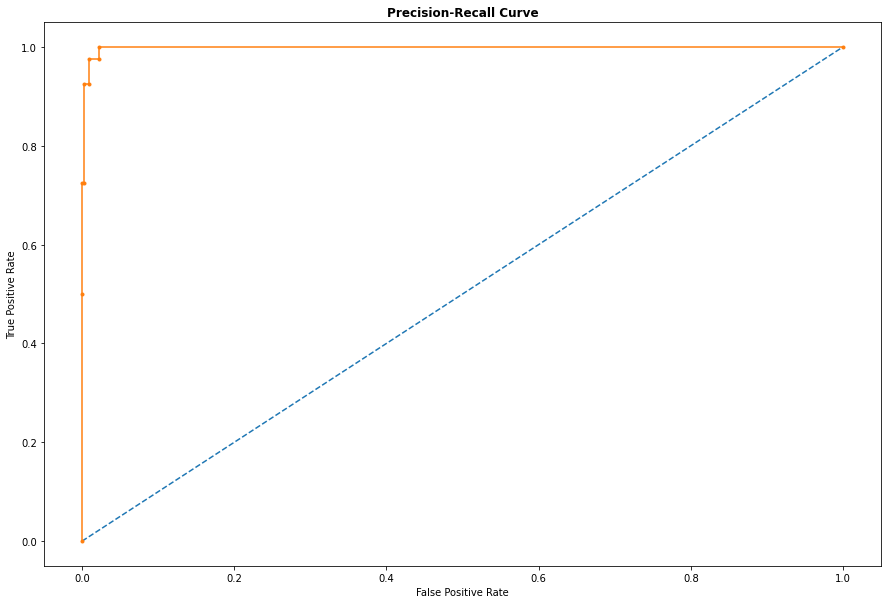

In [18]:
auc = roc_auc_score(dataset_y_test, dataset_y_pred)
print("AUC: {:.3f}".format(auc))

# Plot the precision-recall curve for the model
fpr, tpr, thresholds = roc_curve(dataset_y_test, dataset_y_pred)

plt.figure(figsize=(15,10))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("Precision-Recall Curve",fontweight="bold")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Multinomial Logistic Regression
In the multinomial logistic regression will predict which digit is in the image.
### Train the model
Unfortunately, there was a bug in the multinomial logistic regression in statsmodels. The model failed to coverge. So, Scikit-Learn seems like a better option.